In [1]:
# Import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# **Pemahaman Data**

In [2]:
df = pd.read_csv("Obesity Classification.csv")

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


Dataset ini berisi kolom-kolom sebagai berikut:

1. **ID**: Identifikasi unik untuk setiap individu.

2. **Umur (Age)**: Umur dari individu.

3. **Jenis Kelamin (Gender)**: Jenis kelamin individu (Laki-laki/Perempuan).

4. **Tinggi (Height)**: Tinggi badan individu (dalam sentimeter).

5. **Berat Badan (Weight)**: Berat badan individu (dalam kilogram).

6. **BMI**: Indeks Massa Tubuh yang dihitung berdasarkan tinggi dan berat badan.

7. **Label**: Klasifikasi status berat badan individu (misalnya, Berat Normal, Kelebihan Berat Badan, Kurang Berat Badan, Obesitas).

In [4]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

* kolom Gender tipe datanya object, seharusnya angka

In [5]:
# Analisis Fitur Numerik
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [6]:
# Pemeriksaan missing values

missing_values = df.isnull().sum()
missing_values

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

* Tidak ada nilai yang hilang. Semua kolom terisi lengkap

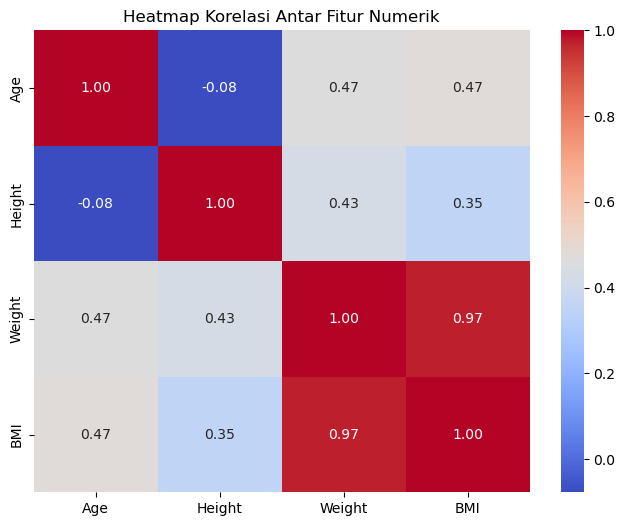

In [7]:
# Melihat korelasi antar fitur numerik

correlation_matrix = df[['Age', 'Height', 'Weight', 'BMI']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

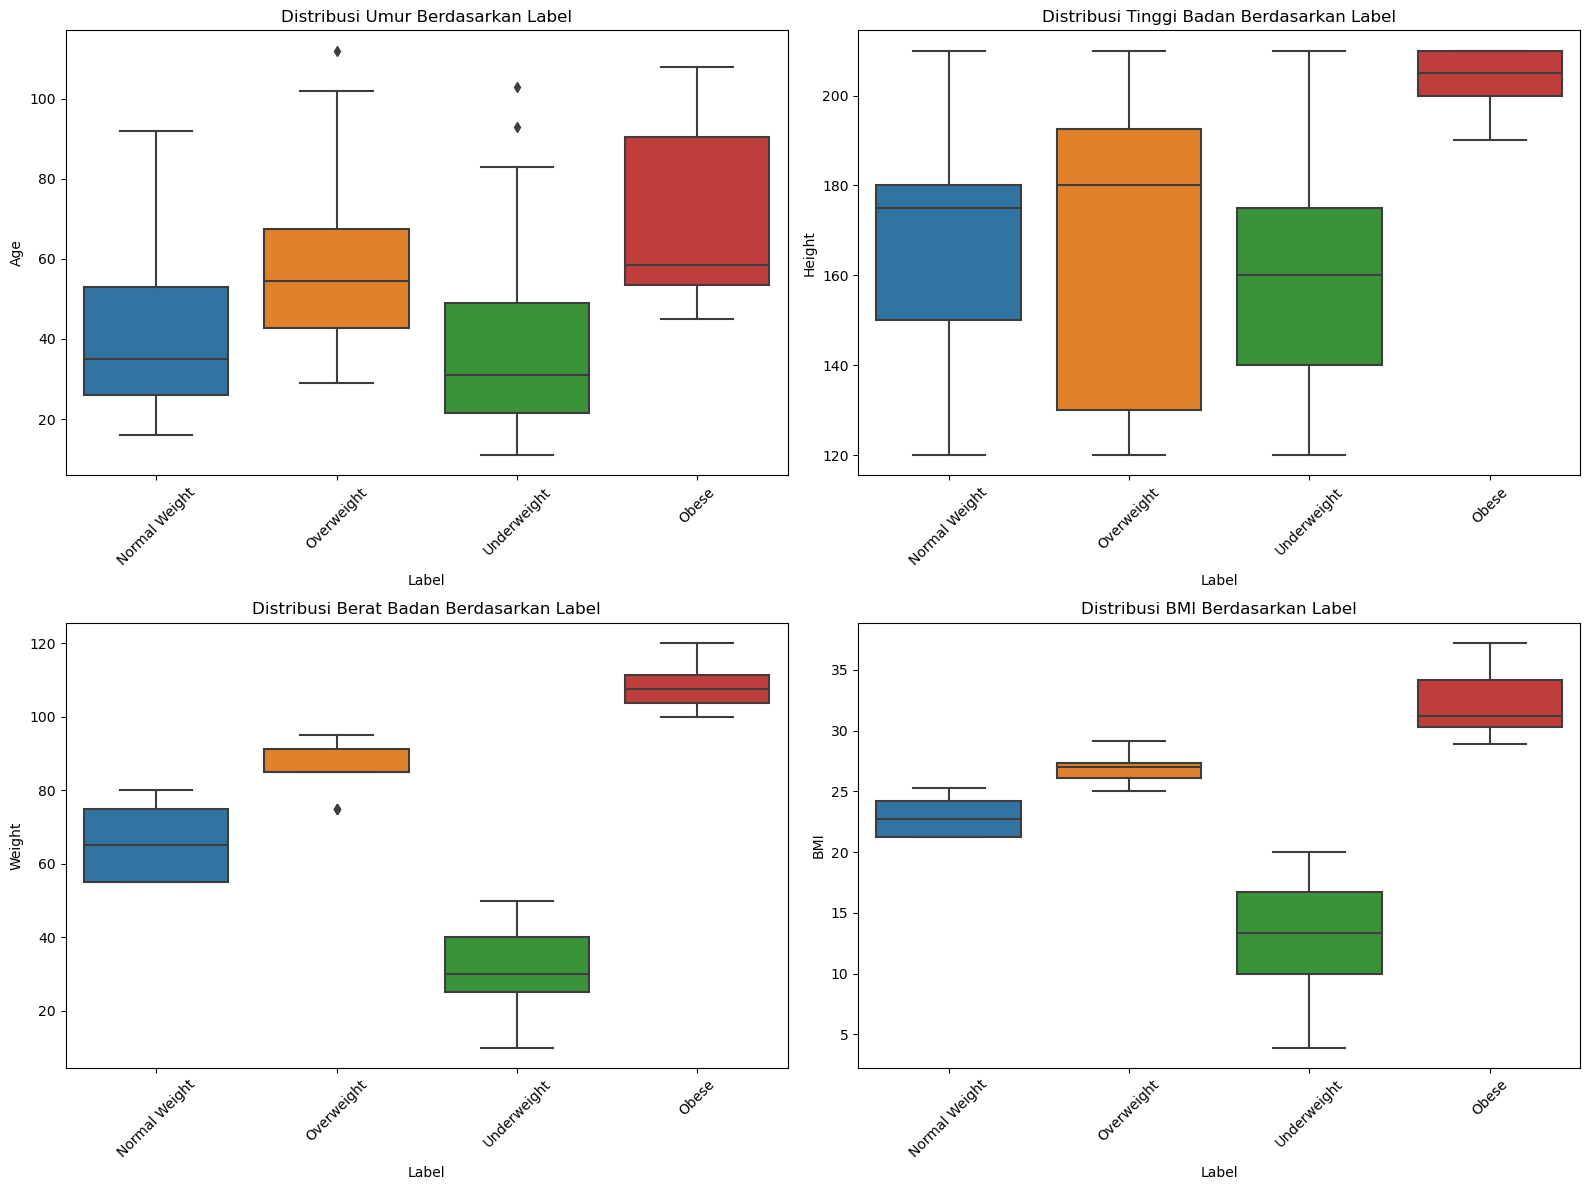

In [8]:
# Melihat korelasi antara fitur dan label

plt.figure(figsize=(16, 12))

# Plot Age vs Label
plt.subplot(2, 2, 1)
sns.boxplot(x='Label', y='Age', data=df)
plt.title('Distribusi Umur Berdasarkan Label')
plt.xticks(rotation=45)

# Plot Height vs Label
plt.subplot(2, 2, 2)
sns.boxplot(x='Label', y='Height', data=df)
plt.title('Distribusi Tinggi Badan Berdasarkan Label')
plt.xticks(rotation=45)

# Plot Weight vs Label
plt.subplot(2, 2, 3)
sns.boxplot(x='Label', y='Weight', data=df)
plt.title('Distribusi Berat Badan Berdasarkan Label')
plt.xticks(rotation=45)

# Plot BMI vs Label
plt.subplot(2, 2, 4)
sns.boxplot(x='Label', y='BMI', data=df)
plt.title('Distribusi BMI Berdasarkan Label')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Berdsarkan visualisasi korelasi antar fitur dengan label, dapat dipahami bahwa:
* BMI dan Berat Badan adalah dua fitur yang sangat memengaruhi klasifikasi label dalam dataset ini. Mereka memiliki korelasi yang jelas dengan status berat badan (kategori) individu.
* Umur dan Tinggi Badan memberikan informasi tambahan, tetapi tidak sekuat pengaruh BMI dan Berat Badan dalam menentukan klasifikasi berat badan.

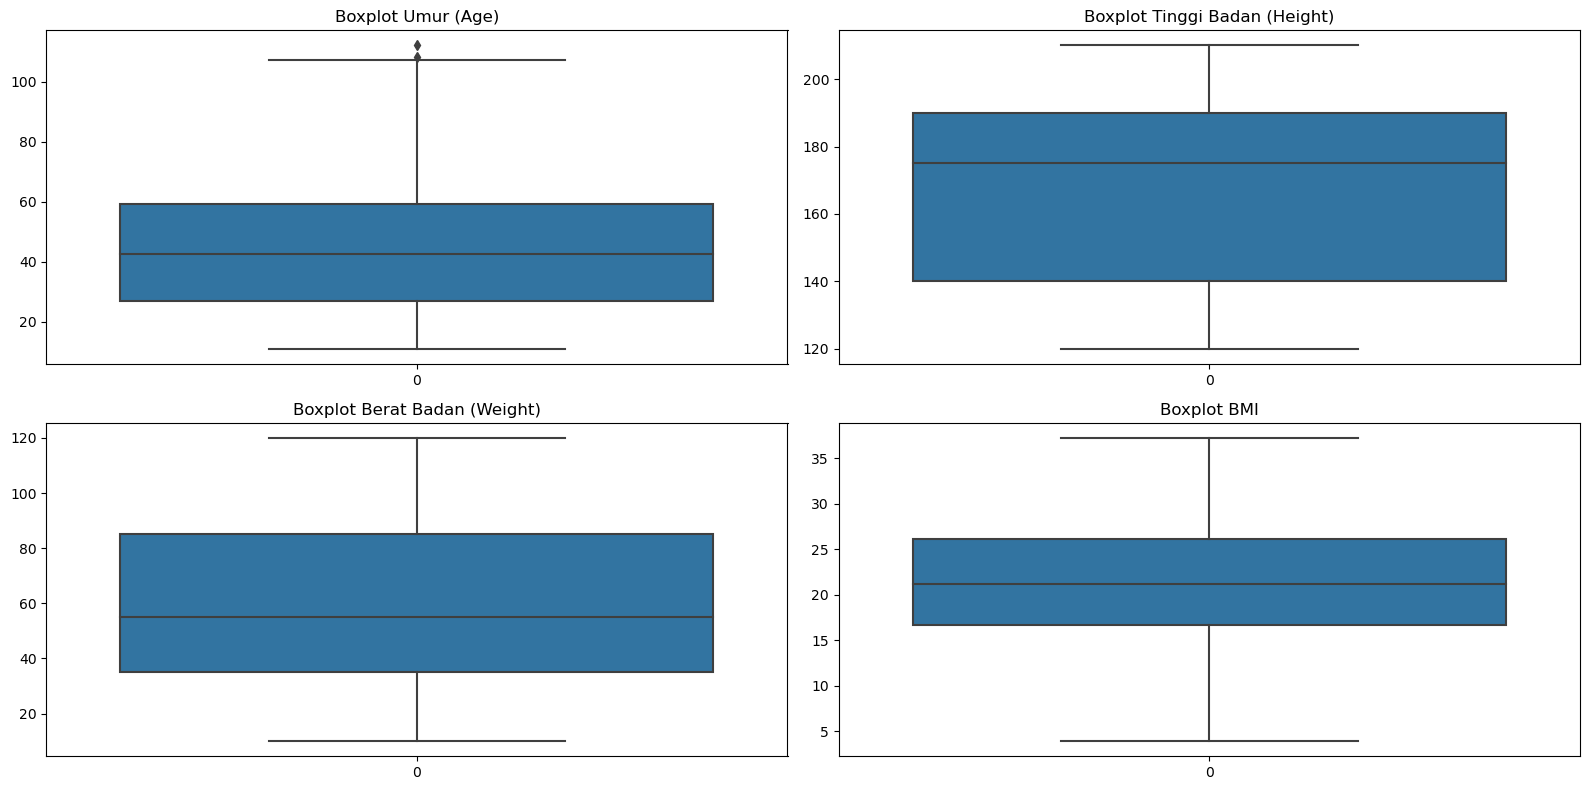

In [9]:
# Cek data outlier dengan boxplot

plt.figure(figsize=(16, 8))

# Plot Age
plt.subplot(2, 2, 1)
sns.boxplot(df['Age'])
plt.title('Boxplot Umur (Age)')

# Plot Height
plt.subplot(2, 2, 2)
sns.boxplot(df['Height'])
plt.title('Boxplot Tinggi Badan (Height)')

# Plot Weight
plt.subplot(2, 2, 3)
sns.boxplot(df['Weight'])
plt.title('Boxplot Berat Badan (Weight)')

# Plot BMI
plt.subplot(2, 2, 4)
sns.boxplot(df['BMI'])
plt.title('Boxplot BMI')

plt.tight_layout()
plt.show()

* Dari visualisasi boxplot diatas, hanya pada fitur atau kolom Age yang memiliki beberapa outlier yang terlihat di atas usia 100 tahun.

### Kesimpulan

* Data lengkap tidak ada missing value.
* Kolom Gender dan Label tipe datanya objek, perlu di encoder
* Kolom ID tidak dibutuhkan.
* Data outlier pada AGE dibiarkan, karena manusia bisa berumur di atas 100 tahun.

# **Persiapan Data**

In [10]:
# Encode kolom Gender

from sklearn.preprocessing import LabelEncoder # library buat encode label atau kolom

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Label'] = LabelEncoder().fit_transform(df['Label'])

In [11]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,0
1,2,30,0,160,60,22.5,0
2,3,35,1,180,90,27.3,2
3,4,40,0,150,50,20.0,3
4,5,45,1,190,100,31.2,1


* 1 = Male, 0 = Female

In [12]:
# Buang kolom ID

df.drop(labels='ID',axis=1,inplace=True)
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,2
3,40,0,150,50,20.0,3
4,45,1,190,100,31.2,1


Selanjutnya splitting data.

karena kolom Label adalah target fiturnya.

In [13]:
from sklearn.model_selection import train_test_split 

# Pisah Label karena sebagai target
x = df.drop('Label', axis=1)
y = df['Label']

# Bagi datanya ke data latih dan data test: 80:20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Modeling** 

Menggunakan algoritma random forest classfier

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Melatih model
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

# **Evaluasi**

In [15]:
# import libary yg dibutuhkan
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# Cek akurasi prediksi pada data test

y_pred = rf.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


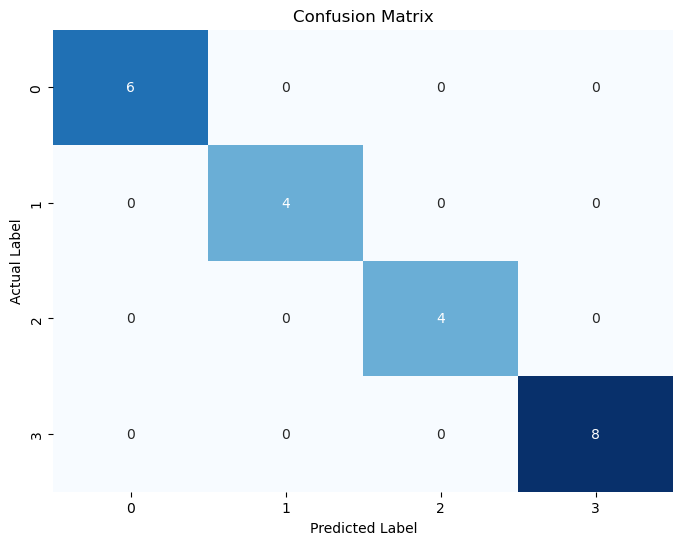

In [17]:
# Cek Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [18]:
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         8

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



# **Deploymeny**

Untuk deploy simpen modelnya dengan pipeline, untuk menyimpan semua weight dri model, agar bisa digunakan. namun perlu di latih ulang.

In [19]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [20]:
# Pipeline model
pipeline = Pipeline(steps=[

    # Random Forest Classifier
    ('model', RandomForestClassifier(random_state=42))
])

In [21]:
# Latih pipeline menggunakan data training
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])

In [22]:
# Simpan pipeline ke file
import joblib

joblib.dump(pipeline, 'obs.pkl')

['obs.pkl']

Coba klasifikasi dengan input nilai

In [23]:
# Muat pipeline yang sudah disimpan
loaded_pipeline = joblib.load('obs.pkl')

# Contoh input data untuk prediksi: Umur, Gender (0 untuk Female, 1 untuk Male), Tinggi, Berat, BMI
age = 35
gender = 1  # 1 untuk male, 0 untuk female
height = 180  # dalam cm
weight = 90  # dalam kg
bmi = weight / ((height / 100) ** 2)  # Hitung BMI manual

# Gabungkan input data
input_data = np.array([[age, gender, height, weight, bmi]])

# Lakukan prediksi
hasil_klasifikasi = loaded_pipeline.predict(input_data)

print(f'Hasil Klasifikasi: {hasil_klasifikasi[0]}')


Hasil Klasifikasi: 2


c:\Users\LEGION 5\anaconda3\envs\MYenv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
